In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import decomposition
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [2]:
def KmeansCluster(df,k):
  

  km = KMeans(k)
  km.fit(df)
  
  pred = km.predict(df)
  centroids = km.cluster_centers_
  labels = km.labels_
  score=silhouette_score(df,labels, metric='euclidean')
  print(f'silhoutte Score is {score} ')

  return centroids ,pred

In [3]:
def hier_cluser(df, k):

  ac = AgglomerativeClustering(n_clusters = k)
  ac.fit(df)
  
  pred = ac.fit_predict(df)
  labels = ac.labels_
  score=silhouette_score(df,labels, metric='euclidean')
  print(f'silhoutte Score is {score} ')
  return pred

In [4]:
def dbscan(df, e, n_points):


  db = DBSCAN(eps=e, min_samples=n_points)
  db.fit(df)
  
  pred = db.fit_predict(df)
  labels = db.labels_
  
  score=silhouette_score(df,labels, metric='euclidean')
  print(f'silhoutte Score is {score} ')
  return pred

In [5]:
def gauss(data, comp_num):

  #apply method
  gm = GaussianMixture(n_components=comp_num)
  gm.fit(data)
  
  pred = gm.predict(data)
  score=silhouette_score(data,pred, metric='euclidean')
  print(f'silhoutte Score is {score} ')

  return pred

In [6]:
df=pd.read_csv('/content/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# New Section

In [7]:
cols=df.columns
features =df[cols]
scaler=preprocessing.MinMaxScaler()
df[cols]=scaler.fit_transform(features.values)

In [8]:
df2=df.copy()

In [9]:
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [10]:
_,_=KmeansCluster(df2,3)

silhoutte Score is 0.2997081530816115 


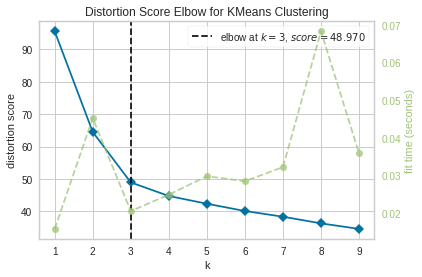

In [11]:
model2= KMeans()
visualizer = KElbowVisualizer(model2, k=(1,10))

visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show()

In [12]:
def pca_elbow(df , n):    
  
  pca =  decomposition.PCA(n_components=n)
  df_pca= pca.fit_transform(df)
  
  model= KMeans()
  visualizer = KElbowVisualizer(model, k=(1,10))
  
  print(f'K and Score at Pca={n}')


  visualizer.fit(df_pca)        
  visualizer.show()

K and Score at Pca=1


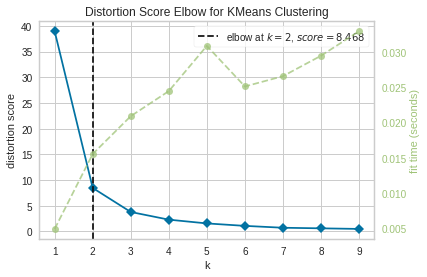

K and Score at Pca=2


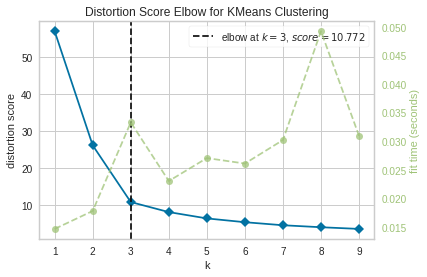

K and Score at Pca=3


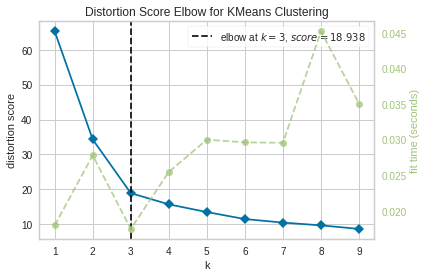

K and Score at Pca=4


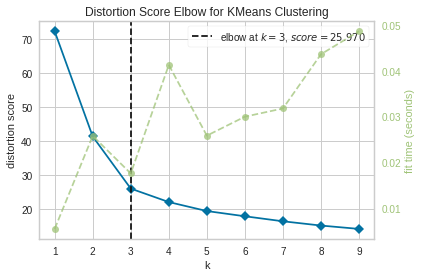

K and Score at Pca=5


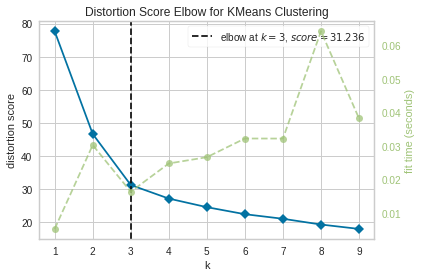

K and Score at Pca=6


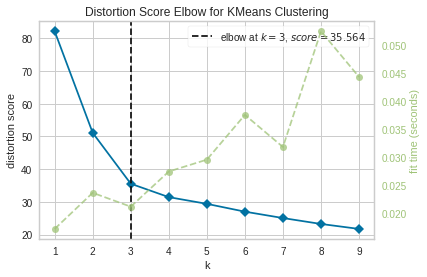

K and Score at Pca=7


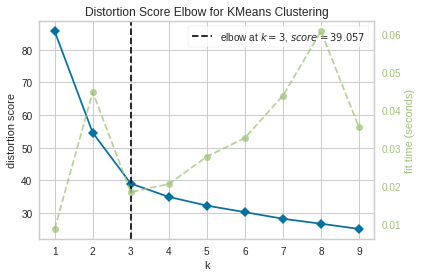

K and Score at Pca=8


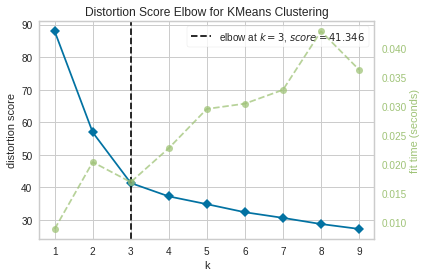

K and Score at Pca=9


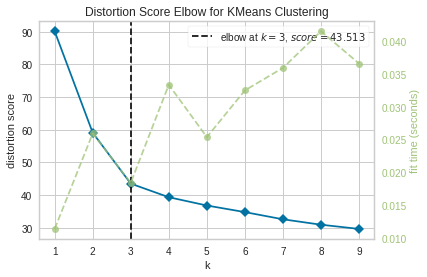

K and Score at Pca=10


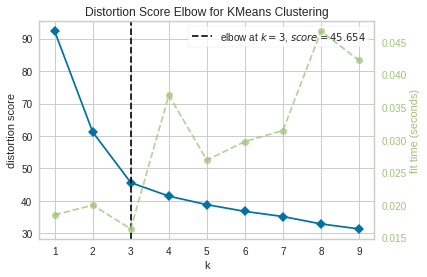

K and Score at Pca=11


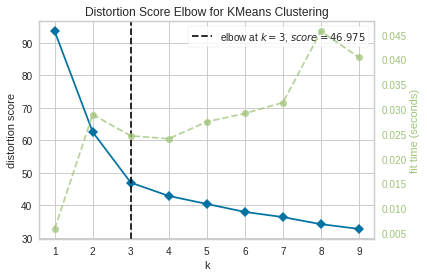

K and Score at Pca=12


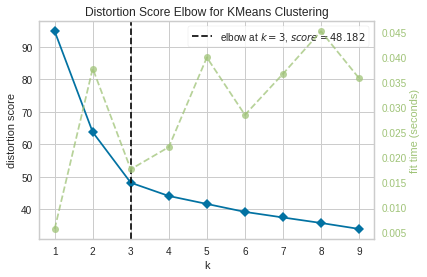

K and Score at Pca=13


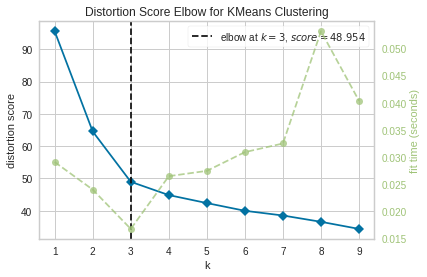

In [13]:
for i in range(1,14):
  pca_elbow(df,i)

In [14]:
pca = decomposition.PCA().fit(df2)
y = np.cumsum(pca.explained_variance_ratio_)
y=y*100
y

array([ 40.74948456,  59.71983634,  68.28150696,  75.70818476,
        81.27348586,  85.93232305,  89.59625195,  92.00504125,
        94.27941178,  96.53037634,  97.91166882,  99.18490474,
       100.        ])

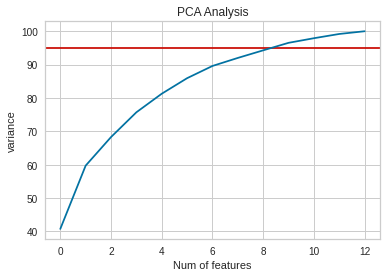

In [15]:
plt.ylabel("variance")
plt.xlabel("Num of features")
plt.title("PCA Analysis")
plt.axhline(y=95, color='r', linestyle='-')
plt.style.context('seaborn-whitegrid')

plt.plot(y)

In [16]:
def pca(df , n):    
  pca =  decomposition.PCA(n_components=n)
  df_pca= pca.fit_transform(df)
  print(f'at PCA ={n}')
  return df_pca

In [17]:
dk=pca(df2,8)

at PCA =8


In [18]:
ck,pk=KmeansCluster(dk,3)

# sns.scatterplot(dk[:,0], dk[:,1], hue=pk)
# sns.scatterplot(ck[:,0], ck[:,1], color='y', s=50)

silhoutte Score is 0.33471048593816516 


In [19]:
ph=hier_cluser(dk,3)
# sns.scatterplot(dk[:,0], dk[:,1], hue=ph, palette='Spectral')

silhoutte Score is 0.32308236865956563 


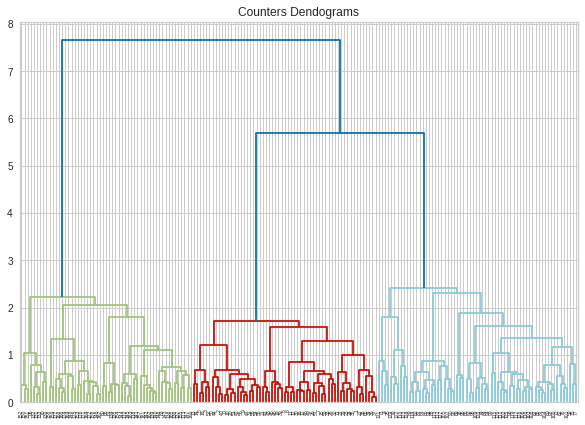

In [20]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y= dk , method='ward',metric='euclidean'))

In [21]:
pd=dbscan(dk,0.7,20)


silhoutte Score is 0.2136476594560434 


In [22]:
pg=gauss(dk,3)


silhoutte Score is 0.33118609493489376 
